### CAPSTONE MODULE 2 DATA ANALYSIS 

## **LATAR BELAKANG**
'Amazon AWS Saas Company' adalah sales company yang melakukan transaksi B2B (Business to Business) dalam bidang penjualan sales dan marketing software kepada perusahaan - perusahaan dari berbagai segment di seluruh dunia.


## **Pernyataan Masalah**

'Amazon SaaS Company' ingin mengetahui profitability perusahaan selama 4 Tahun Terakhir, dengan informasi ini, 'Amazon AWS Saas Company' berharap dapat mengetahui apakah ada aspek yang perlu ditingkatkan untuk memaksimalkan profit perusahaan

Data Analyst dalam hal ini diperlukan untuk mencari tahu:

***"Profitability analisis dari dataset dan peningkatan yang perlu dilakukan SaaS company dari segi product, harga, quantity"***




Untuk menjawab pertanyaan diatas, kita akan menganalisa data penjualan 'SaaS Company'

In [1]:
# Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Read Dataframe - Menampilkan 5 urutan paling atas daari data untuk mengetahui informasi apa saja yang diberikan pada dataframe

data = pd.read_csv('SaaS-Sales.csv')
data.head()


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


Dataset ini berisi informasi transaksi antara SaaS Company dan Perusahaan lain, ada 19 kolom dalam dataset ‘SaaS Sales’:

*	Row ID: Pengidentifikasi unik untuk setiap transaksi.
*	Order ID: Pengidentifikasi unik untuk setiap pesanan.
*	Order Date: Tanggal ketika pesanan dibuat.
*	Date Key: Representasi numerik dari tanggal pesanan (YYYYMMDD).
*	Contact Name: Nama orang yang membuat pesanan.
*	Country: Negara tempat pesanan dibuat.
*	City: Kota tempat pesanan dibuat.
*	Region: Wilayah tempat pesanan dibuat.
*	Subregion: Subwilayah tempat pesanan dibuat.
*	Customer: Nama perusahaan yang membuat pesanan.
*	Customer ID: Pengidentifikasi unik untuk setiap pelanggan.
*	Industry: Industri tempat pelanggan berada.
*	Segment: Segmen pelanggan (SMB, Strategic, Enterprise, etc).
*	Product: Produk yang dipesan.
*	License: Kunci lisensi untuk produk.
*	Sales: Jumlah total penjualan untuk transaksi (USD).
*	Quantity: Jumlah total item dalam transaksi.
*	Dicount: Diskon yang diterapkan pada transaksi.
*	Profit: Keuntungan dari transaksi.

### DATA UNDERSTANDING

Setelah melakukan review pada data yang ada, kita harus melakukan data understanding untuk mengetahui dengan jelas dan teliti isi dari data tersebut

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {data.shape}')
data.info()
data.describe(include='all')

Jumlah baris dan kolom di dataset df adalah (9994, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      99

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9.994000e+03,9994,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,1237,NaN,793,48,262,3,12,99,NaN,10,3,14,9994,NaN,NaN,NaN,NaN
top,NaN,EMEA-2023-100111,9/6/2022,NaN,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,NaN,Finance,SMB,ContactMatcher,16GRM07R1K,NaN,NaN,NaN,NaN
freq,NaN,14,38,NaN,37,2001,922,4219,2507,192,NaN,2127,5191,1842,1,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,NaN,2.021803e+07,NaN,NaN,NaN,NaN,NaN,NaN,1049.771963,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,2885.163629,NaN,NaN,1.123898e+04,NaN,NaN,NaN,NaN,NaN,NaN,29.719388,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,1.000000,NaN,NaN,2.020010e+07,NaN,NaN,NaN,NaN,NaN,NaN,1001.000000,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,NaN,2.021052e+07,NaN,NaN,NaN,NaN,NaN,NaN,1024.000000,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,NaN,2.022063e+07,NaN,NaN,NaN,NaN,NaN,NaN,1049.000000,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,NaN,2.023052e+07,NaN,NaN,NaN,NaN,NaN,NaN,1076.000000,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


Dari informasi diatas, telah diketahui dataset memiliki 9994 baris/Row dan 19 kolom/column. Ditemukan juga bahwa pada column 'Order Date' masih menggunakan format string dan harus diubah menjadi format Date&Time pada data formating.

### DATA CLEANING

In [4]:
# Identifikasi Missing Value

data.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Tidak ada Missing value dalam dataset ini, sehingga analyisis dapat dilanjutkan

In [5]:
# Menghapus Duplikat 

duplicate_rows = data.duplicated().sum()
duplicate_rows

0

In [6]:
# Drop Column untuk yang dainggap tidak diperlukan

data = data.drop(columns=['Row ID','Date Key','Customer ID'])

Tidak ditemukan duplikat pada data ini namun ada beberapa column yang terlihat tidak diperlukan untuk analisis:  
1. Column 'Order Date' dan 'Date Key' yang data nya sama
2. Column 'Row ID' yang tidak memiliki hubungan dengan column manapun
3. 'Customer ID' yang bisa direpresentasikan dengan 'order ID'

Oleh karena itu, column tersebut di drop

### DATA FORMATING

Seperti yang dijelaskan pada data understanding, pada dataset ini yang perlu di format ialah 'Order Date' dimana format masih dalam bentuk 'string' dan perlu diubah menjadi 'date&time'

In [7]:
# Convert 'Order Date' format menjadi date&time

data['Order Date'] = pd.to_datetime(data['Order Date'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Contact Name  9994 non-null   object        
 3   Country       9994 non-null   object        
 4   City          9994 non-null   object        
 5   Region        9994 non-null   object        
 6   Subregion     9994 non-null   object        
 7   Customer      9994 non-null   object        
 8   Industry      9994 non-null   object        
 9   Segment       9994 non-null   object        
 10  Product       9994 non-null   object        
 11  License       9994 non-null   object        
 12  Sales         9994 non-null   float64       
 13  Quantity      9994 non-null   int64         
 14  Discount      9994 non-null   float64       
 15  Profit        9994 non-null   float64 

Format 'Order Date' telah diubah dari format string menjadi format date&time

### PENANGANAN OUTLIER

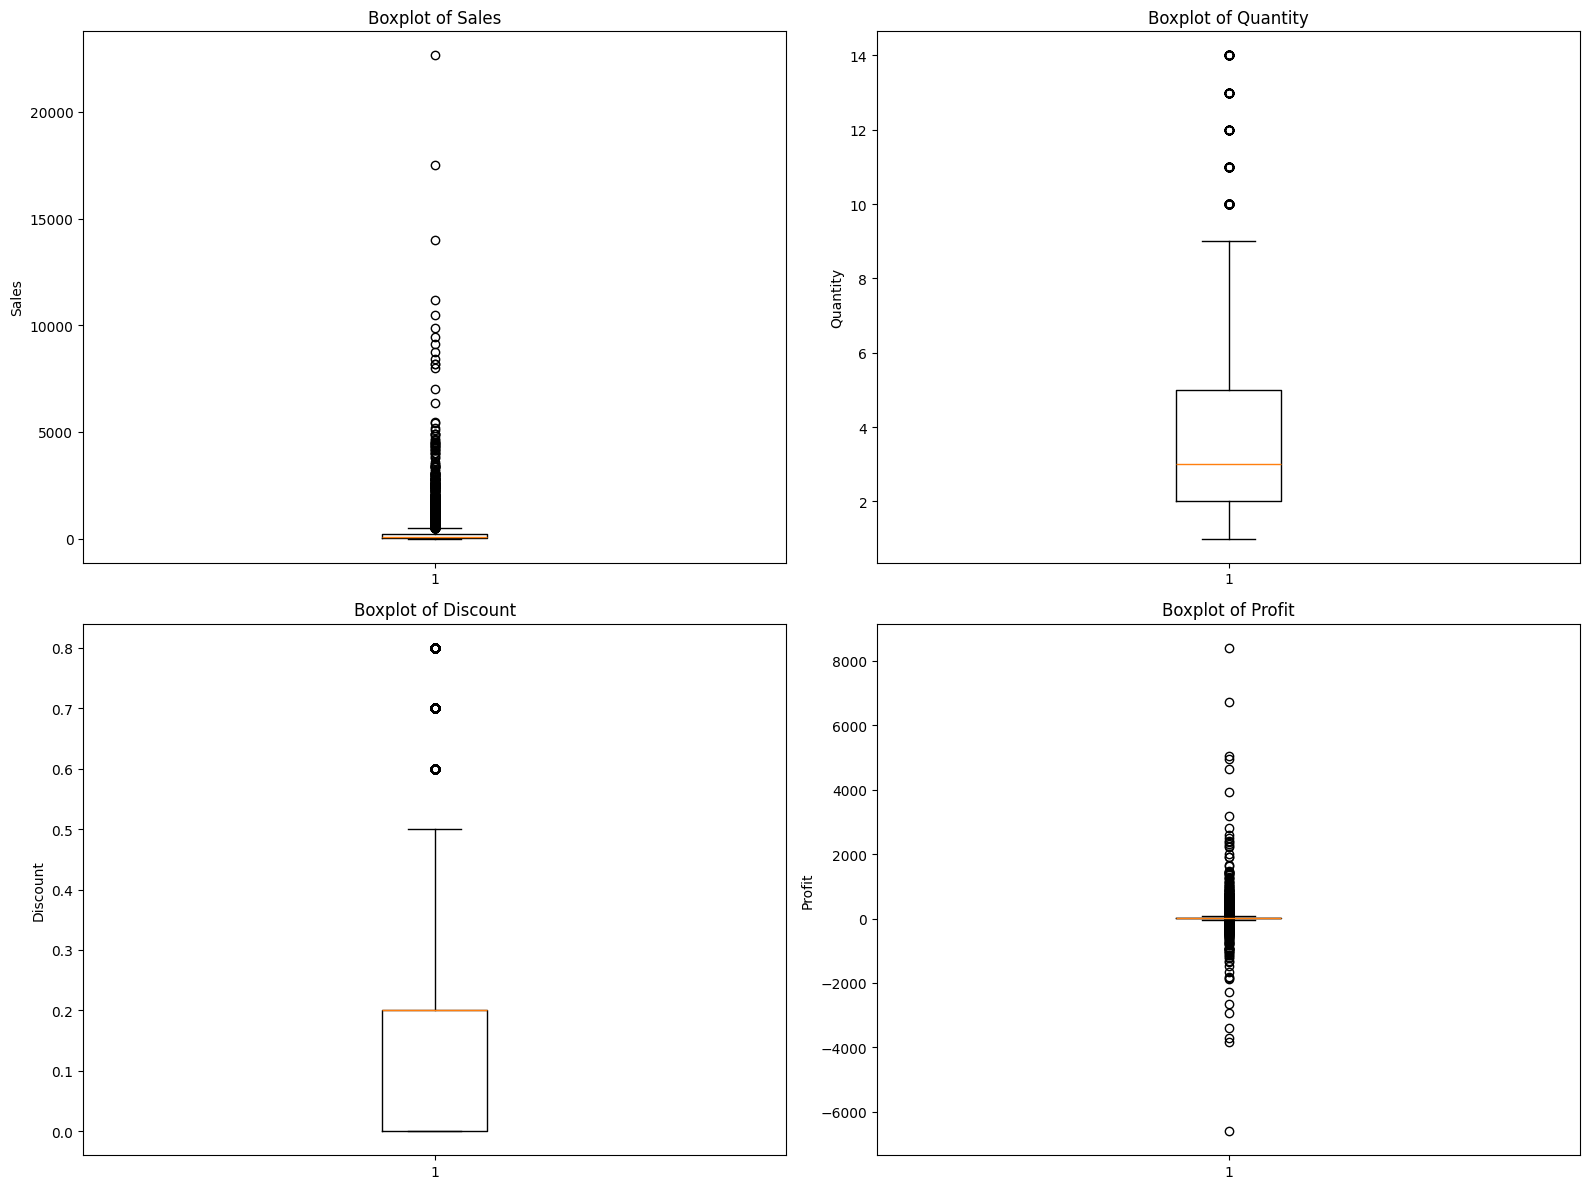

In [9]:
# Membuat boxplot untuk mencari outliers untuk data 'Sales', 'Quantity', 'Discount', and 'Profit'
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Boxplot for Sales
axes[0, 0].boxplot(data['Sales'])
axes[0, 0].set_title('Boxplot of Sales')
axes[0, 0].set_ylabel('Sales')

# Boxplot for Quantity
axes[0, 1].boxplot(data['Quantity'])
axes[0, 1].set_title('Boxplot of Quantity')
axes[0, 1].set_ylabel('Quantity')

# Boxplot for Discount
axes[1, 0].boxplot(data['Discount'])
axes[1, 0].set_title('Boxplot of Discount')
axes[1, 0].set_ylabel('Discount')

# Boxplot for Profit
axes[1, 1].boxplot(data['Profit'])
axes[1, 1].set_title('Boxplot of Profit')
axes[1, 1].set_ylabel('Profit')

plt.tight_layout()
plt.show()


***1. Sales (Penjualan):***

Terdapat beberapa outlier pada nilai penjualan yang sangat tinggi.

***2. Quantity (Kuantitas):***

Kuantitas juga menunjukkan beberapa outlier, terutama pada jumlah yang lebih tinggi.

***3. Discount (Diskon):***

Diskon menunjukkan beberapa outlier, terutama pada nilai diskon yang lebih tinggi.

***4. Profit (Keuntungan):***

Profit memiliki beberapa outlier, terutama pada nilai profit yang sangat tinggi atau sangat rendah.

In [10]:
# Handling Outlier

# Menghitung Q1 dan Q3 untuk setiap kolom
Q1 = data[['Sales', 'Quantity', 'Discount', 'Profit']].quantile(0.25)
Q3 = data[['Sales', 'Quantity', 'Discount', 'Profit']].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengidentifikasi outlier
sales_otl = data[(data['Sales'] < lower_bound['Sales']) | (data['Sales'] > upper_bound['Sales'])].shape[0]
qty_otl = data[(data['Quantity'] < lower_bound['Quantity']) | (data['Quantity'] > upper_bound['Quantity'])].shape[0]
disc_otl = data[(data['Discount'] < lower_bound['Discount']) | (data['Discount'] > upper_bound['Discount'])].shape[0]
pro_otl = data[(data['Profit'] < lower_bound['Profit']) | (data['Profit'] > upper_bound['Profit'])].shape[0]

outliers = data[(
    (data['Sales'] < lower_bound['Sales']) | (data['Sales'] > upper_bound['Sales']) |
    (data['Quantity'] < lower_bound['Quantity']) | (data['Quantity'] > upper_bound['Quantity']) |
    (data['Discount'] < lower_bound['Discount']) | (data['Discount'] > upper_bound['Discount']) |
    (data['Profit'] < lower_bound['Profit']) | (data['Profit'] > upper_bound['Profit'])
)]

print (f'Jumlah Outlier pada Sales adalah {sales_otl}')
print (f'Jumlah Outlier pada Quantity adalah {qty_otl}')
print (f'Jumlah Outlier pada Discount adalah {disc_otl}')
print (f'Jumlah Outlier pada Profit adalah {pro_otl}')

outliers.sample(5)


Jumlah Outlier pada Sales adalah 1167
Jumlah Outlier pada Quantity adalah 170
Jumlah Outlier pada Discount adalah 856
Jumlah Outlier pada Profit adalah 1881


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
8205,EMEA-2021-114811,2021-11-08,William May,United Kingdom,London,EMEA,UKIR,AT&T,Communications,Strategic,FinanceHub,GOTZWRDY82,577.764,2,0.1,115.5528
6163,EMEA-2020-103989,2020-03-19,Molly Rutherford,Germany,Frankfurt,EMEA,EU-WEST,PepsiCo,Consumer Products,Strategic,ContactMatcher,TEYTF5ERN6,33.570,5,0.7,-25.7370
690,EMEA-2020-117135,2020-06-21,Pippa Blake,Spain,Madrid,EMEA,EU-WEST,Caterpillar,Manufacturing,SMB,Site Analytics,Z0ICB6R86B,284.820,1,0.0,74.0532
8397,APJ-2020-120236,2020-09-03,Trevor Jones,Japan,Tokyo,APJ,JAPN,Kroger,Retail,Enterprise,ContactMatcher,T2F1UU34XF,7.680,5,0.8,-11.5200
2092,EMEA-2020-145926,2020-11-17,Dylan Ogden,Luxembourg,Luxembourg,EMEA,EU-WEST,HonHai Precision Industry,Tech,Enterprise,FinanceHub,O182K9LDYB,479.900,5,0.0,81.5830


------------------------------
HASIL PENCARIAN OUTLIER

Dari hasil pencarian outliers dan komparasi data barisan yang memiliki outlier, walaupun dataset ini memiliki outlier, outliers tidak di hapus atau di ubah outliers karena data tersebut masih dianggap valid dan dibutuhkan untuk analisis.

--------------------

In [11]:
# Memperlihatkan data setelah memalui proses data cleaning

data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Contact Name  9994 non-null   object        
 3   Country       9994 non-null   object        
 4   City          9994 non-null   object        
 5   Region        9994 non-null   object        
 6   Subregion     9994 non-null   object        
 7   Customer      9994 non-null   object        
 8   Industry      9994 non-null   object        
 9   Segment       9994 non-null   object        
 10  Product       9994 non-null   object        
 11  License       9994 non-null   object        
 12  Sales         9994 non-null   float64       
 13  Quantity      9994 non-null   int64         
 14  Discount      9994 non-null   float64       
 15  Profit        9994 non-null   float64 

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,EMEA-2020-110422,2020-01-22,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


## ***DATA ANALYSIS***


### **Profitability Analysis**

Kita memulai dengan overview profitability analysis melalui visualisasi **Profit Trend** dan komparasi profit pada **Region, Segment, Product**

In [12]:
data['Profit'].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

In [13]:
# Profit Trend

data['YearMonth'] = data['Order Date'].dt.to_period('M')
profit_trends = data.groupby('YearMonth')['Profit'].sum().reset_index()
profit_trends['YearMonth'] = profit_trends['YearMonth'].dt.to_timestamp()


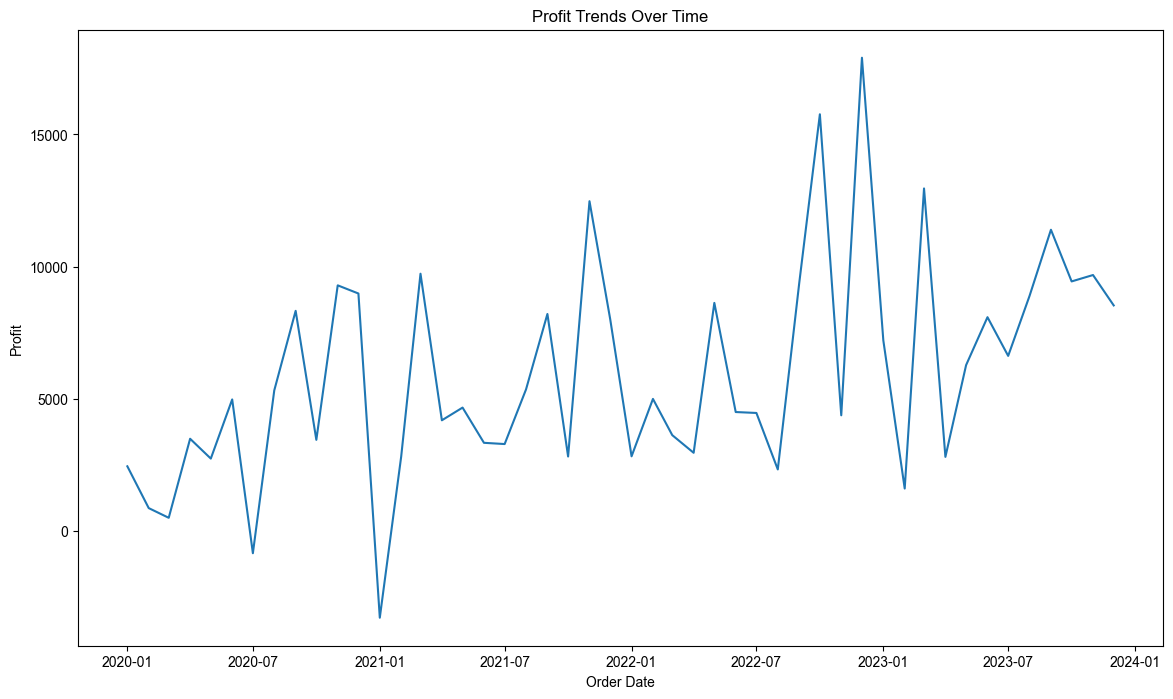

In [14]:
# Visualization

plt.figure(figsize=(14, 8))
sns.lineplot(x='YearMonth', y='Profit', data=profit_trends)
sns.set(style="whitegrid")
plt.title('Profit Trends Over Time')
plt.xlabel('Order Date')
plt.ylabel
plt.show()

**INSIGHT:**

**Fluktuasi Profit:**

Grafik menunjukkan fluktuasi yang signifikan dalam profit dari waktu ke waktu. Ada periode peningkatan tajam dan penurunan drastis dalam profit.
Fluktuasi ini bisa disebabkan oleh berbagai faktor, termasuk perubahan permintaan pasar, strategi pemasaran, atau biaya yang tidak konsisten.

**Puncak dan Lembah:**

Beberapa puncak dalam grafik menunjukkan waktu ketika profit mencapai nilai tertinggi. Sebaliknya, lembah menunjukkan periode ketika profit menurun drastis atau bahkan negatif.
Meneliti periode puncak dan lembah ini dapat memberikan wawasan tentang faktor-faktor yang mempengaruhi performa profit perusahaan.

**Tren Umum:**

Meskipun ada fluktuasi, tampaknya ada tren umum peningkatan profit dalam jangka panjang, terutama setelah pertengahan 2021.

In [15]:
# profit by Region

profit_by_region = data.groupby('Region')[['Sales', 'Profit']].sum().reset_index()
profit_by_region

,Region,Sales,Profit
0,AMER,8.378496e+05,127426.9898
1,APJ,4.154642e+05,11513.9869
2,EMEA,1.043887e+06,147456.0450


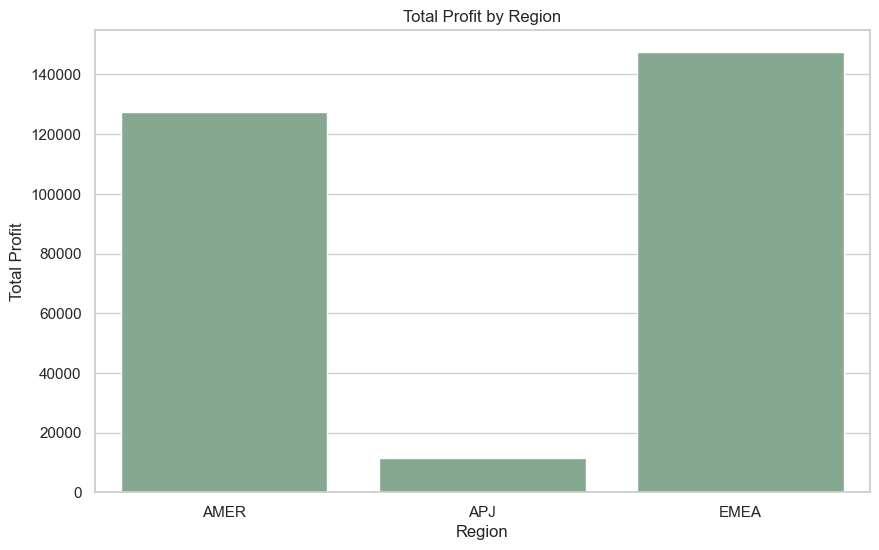

In [16]:
# Visualizaation
plt.figure(figsize=(10, 6))
sns.barplot(data = profit_by_region, x='Region', y='Profit', color='#82ad8e')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()


**INSIGHT:**

Pada hasil analisis dan barchart diatas, menunjukkan total profit berdasarkan wilayah, yang dibagi menjadi tiga wilayah: AMER (Amerika), APJ (Asia-Pasifik dan Jepang), dan EMEA (Eropa, Timur Tengah, dan Afrika). Berikut adalah rincian dari diagram ini:

**AMER (Amerika):**
Total profit untuk wilayah AMER sedikit di atas 120.000.

**APJ (Asia-Pasifik dan Jepang):**
Total profit untuk wilayah APJ jauh lebih rendah dibandingkan dengan wilayah lainnya, sekitar 15.000.

**EMEA (Eropa, Timur Tengah, dan Afrika):**
Total profit untuk wilayah EMEA adalah yang tertinggi, melebihi 140.000.

In [17]:
# Profit by Segment

profit_by_segment = data.groupby('Segment')['Profit'].sum().reset_index()
profit_by_segment

,Segment,Profit
0,Enterprise,60298.6785
1,SMB,134119.2092
2,Strategic,91979.1340


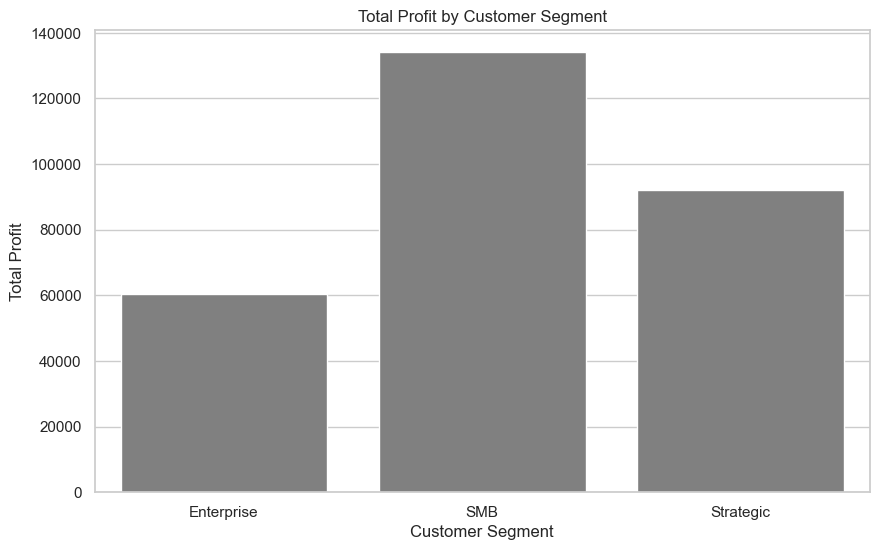

In [18]:
# Visualization 

plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Profit', data=profit_by_segment, color='grey')
plt.title('Total Profit by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Profit')
plt.show()


**INSIGHT:**

**Segmen SMB:**

Segmen SMB menunjukkan total profit tertinggi, jauh melebihi dua segmen lainnya.
Ini menunjukkan bahwa produk dan layanan sangat diterima dan dihargai oleh bisnis kecil dan menengah.

**Segmen Enterprise:**

Segmen Enterprise menunjukkan total profit terendah di antara ketiga segmen.
Meskipun masih menguntungkan, segmen ini memiliki ruang untuk peningkatan dibandingkan dengan segmen SMB dan Strategic.

**Segmen Strategic:**

Segmen Strategic memiliki total profit yang lebih tinggi dibandingkan dengan segmen Enterprise tetapi masih di bawah segmen SMB.
Segmen ini mewakili bagian signifikan dari total profit, menunjukkan kehadiran yang kuat.

In [19]:
# Profit by Product

profit_by_product = data.groupby('Product')['Profit'].sum().reset_index()
profit_by_product

,Product,Profit
0,Alchemy,55617.8249
1,Big Ol Database,3384.7569
2,ChatBot Plugin,6527.7870
3,ContactMatcher,12496.2822
4,Data Smasher,41936.6357
5,FinanceHub,32136.4203
6,Marketing Suite,-3472.5560
7,Marketing Suite - Gold,21278.8264
8,OneView,18138.0054
9,SaaS Connector Pack,13059.1436


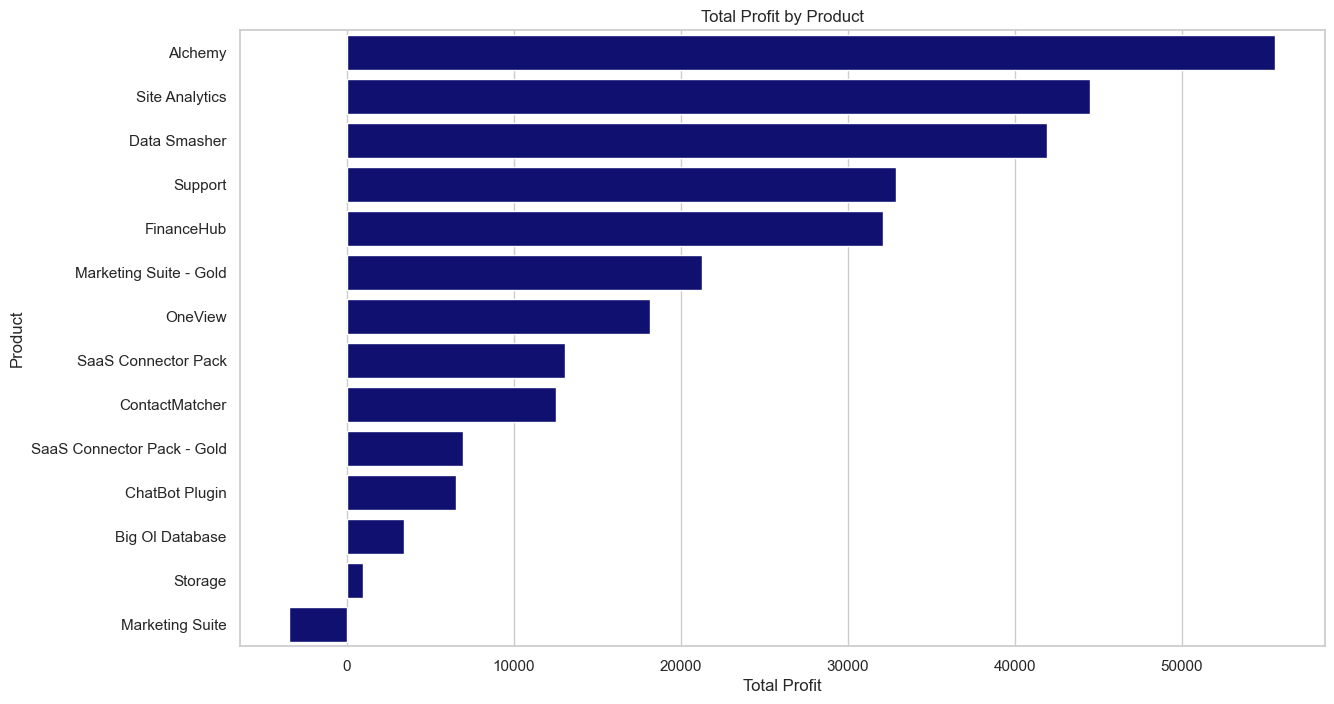

In [20]:
# Visualization

plt.figure(figsize=(14, 8))
sns.barplot(x='Profit', y='Product', data=profit_by_product.sort_values(by='Profit', ascending=False), color= 'navy')
plt.title('Total Profit by Product')
plt.xlabel('Total Profit')
plt.ylabel('Product')
plt.show()


**INSIGHT:**

**Produk dengan Profit Tertinggi:**

Alchemy memiliki total profit tertinggi, mendekati 50.000.
Site Analytics berada di posisi kedua dengan profit sekitar 45.000.
Data Smasher mendekati 40.000.

**Produk dengan Profit Sedang:**

Support, FinanceHub, dan Marketing Suite - Gold memiliki profit antara 20.000 hingga 30.000.
OneView dan SaaS Connector Pack memiliki profit di kisaran 15.000 hingga 20.000.

**Produk dengan Profit Rendah:**

ContactMatcher, SaaS Connector Pack - Gold, dan ChatBot Plugin memiliki profit di bawah 10.000.
Big Ol Database, Storage, dan Marketing Suite memiliki profit yang sangat rendah, di bawah 5.000.

### ***Kesimpulan Profitability Analisis***
Kesimpulan
Analisis gabungan ini memberikan gambaran menyeluruh tentang profitabilitas di pada aspek wilayah, segmen pelanggan, dan produk. Dengan berfokus pada area yang memiliki profitabilitas rendah dan meningkatkan strategi untuk segmen dan produk yang berkinerja tinggi, perusahaan dapat mengoptimalkan profitabilitas keseluruhan dan mendorong pertumbuhan bisnis. 

### ***Rekomendasi***

Fokus pada Wilayah APJ: Selidiki faktor-faktor yang menyebabkan profitabilitas rendah di wilayah APJ. Ini mungkin melibatkan analisis pasar, strategi kompetitif, atau perbaikan operasional

Tingkatkan Fokus pada SMB: Perkuat upaya di segmen SMB dengan menawarkan solusi yang disesuaikan, meningkatkan layanan pelanggan, dan meningkatkan upaya pemasaran.

Tumbuhkan Segmen Enterprise dan Strategic: Jelajahi peluang untuk meningkatkan profitabilitas di segmen Enterprise dan Strategic. Ini mungkin melibatkan solusi yang disesuaikan, pemasaran yang ditargetkan, dan strategi keterlibatan yang lebih baik.

Dukung Produk Teratas: Lanjutkan investasi dan dukungan pada produk yang berkinerja terbaik untuk mempertahankan dan meningkatkan profitabilitas mereka.

## ***Menangani Kerugian Marketing Suite***

Pada analisis diatas, 'Amazon SaaS Company masih memiliki tingkat profitabilitas yang cukup baik. Akan tetapi, ditemukan bahwa salah satu product bernama **'Marketing Suite'** mengalami **kerugian (loss)** yang cukup besar pada angka **-$3,472.556**.

Selanjutnya analis perlu mencari tahu kemungkinan penyebab kerugian pada product tersebut dan cara menangani kerugian product itu

### Analisis Kerugian 'Marketing Suite'

Untuk menganalisis Kerugian 'Marketing Suite' kita perlu melakukan komparasi Profit, Quantity, Sales, dan Discount pada product 'Marketing Suite'



In [21]:
## Filter data 'Marketing Suite'
marketing_suite_data = data[(data['Product'] == 'Marketing Suite') & (data['Product'] != 'Marketing Suite - Gold')]         #Exclude Maarketing Suite - Gold

# Calculate total sales, profit, quantity, and discount for 'Marketing Suite'
marketing_suite_summary = marketing_suite_data.agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Discount': 'sum'
}).reset_index()

marketing_suite_summary.columns = ['Metric', 'Total']
marketing_suite_summary

,Metric,Total
0,Sales,114879.9963
1,Profit,-3472.5560
2,Quantity,868.0000
3,Discount,48.1400


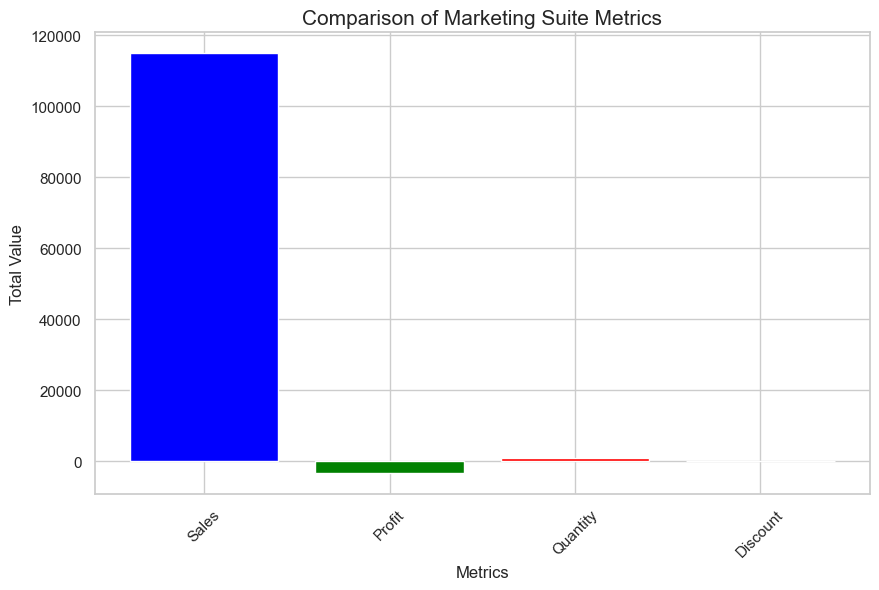

In [22]:
# Visualization
metrics = marketing_suite_summary['Metric']
totals = marketing_suite_summary['Total']

plt.figure(figsize=(10, 6))
plt.bar(metrics, totals, color=['blue', 'green', 'red', 'orange'])
plt.title('Comparison of Marketing Suite Metrics', fontsize=15)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Total Value', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

-----------------------------------
**INSIGHT**

**Total Penjualan (Sales):**

Total penjualan mencapai angka yang tinggi yaitu sekitar $114,879.9963.
Ini menunjukkan bahwa produk ini memiliki penerimaan pasar yang baik dari sisi volume penjualan.

**Total Profit:**

Total profit menunjukkan angka negatif yaitu -$3,472.556.
Ini berarti bahwa meskipun penjualan tinggi, produk ini mengalami kerugian. Hal ini bisa diakibatkan oleh biaya produksi yang tinggi, strategi harga yang tidak sesuai, atau diskon yang berlebihan.

**Total Kuantitas:**

Total kuantitas terjual adalah 868 unit.
Angka ini menunjukkan bahwa ada permintaan yang signifikan untuk produk ini.

**Total Diskon:**

Total diskon yang diberikan sebesar $48.14.
Diskon ini relatif kecil dibandingkan dengan total penjualan, namun bisa saja masih berkontribusi terhadap kerugian jika margin profit terlalu tipis.

---------------------------------------------------------------
### **Potensi Penyebab Kerugian**

**1. Biaya Produksi yang Tinggi:** 
Biaya yang dikeluarkan untuk memproduksi produk ini mungkin tidak sebanding dengan harga jual, sehingga menyebabkan kerugian.

**2. Strategi Harga yang Tidak Tepat:**  
Produk mungkin dijual dengan harga yang terlalu rendah untuk menutupi semua biaya yang terlibat.

**3. Diskon yang Diberikan:**  
Meskipun total diskon tidak terlalu besar, diskon tetap bisa mempengaruhi margin profit, terutama jika produk sudah memiliki margin yang tipis.


------------

### **Tindakan Potensial untuk Mengatasi Kerugian**


**1.Evaluasi dan Optimisasi Biaya:**

Lakukan analisis mendalam untuk mengidentifikasi dan mengurangi biaya produksi tanpa mengorbankan kualitas produk.

**2.Penyesuaian Strategi Harga:**

Tinjau kembali strategi harga untuk memastikan produk dijual dengan harga yang mencerminkan biaya produksi dan nilai yang diberikan kepada pelanggan.
Pertimbangkan untuk menerapkan model harga berbasis nilai atau menaikkan harga secara bertahap.

**3.Optimalisasi Diskon dan Promosi:**

Evaluasi efektivitas diskon dan promosi yang saat ini diterapkan.
Batasi diskon yang berlebihan dan fokus pada promosi yang memberikan nilai tambah tanpa mengorbankan profitabilitas.

**4.Meningkatkan Efisiensi Pemasaran:**

Tinjau kembali strategi pemasaran untuk memastikan anggaran pemasaran dialokasikan ke saluran yang paling efektif.
Kurangi biaya pemasaran yang tidak memberikan hasil signifikan dan fokus pada kampanye yang terbukti berhasil.

------------------